## Santhosh S
## 225229133
## SMA lab 4

#   

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("Connections.csv")

In [3]:
data.head()

,First Name,Last Name,URL,Email Address,Company,Position,Connected On
0,Arockia,Rexy,https://www.linkedin.com/in/arockia-rexy-b2031...,NaN,NaN,NaN,27-Jul-23
1,Santhosh,Selvam,https://www.linkedin.com/in/santhosh-selvam-85...,NaN,NaN,NaN,27-Jul-23
2,Annapoornima,S,https://www.linkedin.com/in/annapoornima-s-5b5...,NaN,NaN,NaN,24-Jul-23
3,Hariharan,S,https://www.linkedin.com/in/hariharan-s-12a016224,NaN,NaN,NaN,23-Jul-23
4,Manickavalli,Nachiappan,https://www.linkedin.com/in/manickavalli-nachi...,NaN,Wipro Technologies,People Ambassador,17-Jul-23


In [4]:
data.dtypes


First Name        object
Last Name         object
URL               object
Email Address    float64
Company           object
Position          object
Connected On      object
dtype: object

In [5]:
data.dropna(subset=['Company'], inplace=True)

In [6]:
data['Company'].value_counts()

Bishop Heber College, Tiruchirappalli - 620 017.    7
MENMOZHI TECHNOLOGIES                               2
Innova Solutions                                    2
Wipro Technologies                                  1
Zuci Systems                                        1
Googla InfoTech                                     1
Besten Engineers and Consultants India Pvt Ltd      1
Colan Infotech Private Limited                      1
STERIL-GENE LIFE SCIENCES PRIVATE LIMITED           1
Actify Data Labs                                    1
Nitroware Technology                                1
COZYSTAY TECHNOLOGIES PRIVATE LIMITED               1
Infoziant                                           1
iNeuron.ai                                          1
 International Journal of Computer Science          1
MedTourEasy                                         1
Bishop Heber College                                1
Astellas Pharma                                     1
Norwin Technology           

In [9]:
data['Position'].value_counts()

Data Science Intern                                         3
Data Scientist                                              2
Technical Recruiter                                         1
Editorial Board Member                                      1
Recruiter                                                   1
Test Engineer                                               1
Assistant Professor                                         1
Assistant Professor, Department of Mathematics              1
Fresher                                                     1
People Ambassador                                           1
Data Analyst                                                1
Workday Consultant                                          1
Python (Django)                                             1
Intern                                                      1
Junior management trainee                                   1
Software Engineer                                           1
Human Re

In [10]:
def remove_company_suffix(org):
    if pd.notna(org):
        suffixes = ["Inc.", "Ltd.", "Corp.", "LLC", "Co.", "AG", "GmbH", "BV", "S.A.", "Pvt. Ltd.", "LLP"]
        for suffix in suffixes:
            org = org.replace(suffix, "").strip()
    return org

In [11]:
data['Company']=data['Company'].apply(remove_company_suffix)
data['Company']

4                                   Wipro Technologies
5                                    Norwin Technology
6                                 Ameyacloud Solutions
8                                    Akshera Yuva Kids
13            ZF Rane Automotive India Private Limited
14               Suven Consultants and Technology Pvt.
15    Bishop Heber College, Tiruchirappalli - 620 017.
17                              V R Della Infotech INC
22                                       SYNC INTERN'S
27                                     Larsen & Toubro
28                                      Oasis Infobyte
30              Indian Institute of Technology, Madras
31                               MENMOZHI TECHNOLOGIES
32    Bishop Heber College, Tiruchirappalli - 620 017.
34                 Manipal Health Enterprises Pvt. Ltd
36               Everlast Wellness Medical Center EWMC
37                                Bishop Heber College
39                                     Astellas Pharma
41    Bish

In [12]:
import opencage

In [13]:
from opencage.geocoder import OpenCageGeocode

OCG = OpenCageGeocode('28851aaf28934bd591d52ad45a0a66b1')


In [14]:
import geocoder
g = geocoder.opencage('San Francisco, CA', key='28851aaf28934bd591d52ad45a0a66b1')
g.json

{'DMS': {'lat': "37° 46' 44.49432'' N", 'lng': "122° 25' 11.66160'' W"},
 'Maidenhead': 'CM87ss96ox',
 'Mercator': {'x': -13627721.599, 'y': 4522077.193},
 'address': 'San Francisco, California, United States of America',
 'bbox': {'northeast': [-122.281479, 37.929811],
  'southwest': [-123.173825, 37.6403143]},
 'callingcode': 1,
 'city': 'San Francisco',
 'city_aliases': 'San Francisco',
 'confidence': 1,
 'continent': 'North America',
 'country': 'United States',
 'country_code': 'us',
 'geohash': '9q8yym2wc2vvrn3ukm4t',
 'lat': 37.7790262,
 'lng': -122.419906,
 'mgrs': '10SEG5108381456',
 'ok': True,
 'raw': {'annotations': {'DMS': {'lat': "37° 46' 44.49432'' N",
    'lng': "122° 25' 11.66160'' W"},
   'FIPS': {'state': '06'},
   'MGRS': '10SEG5108381456',
   'Maidenhead': 'CM87ss96ox',
   'Mercator': {'x': -13627721.599, 'y': 4522077.193},
   'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?relation=111968#map=16/37.77903/-122.41991',
    'note_url': 'https://www.openstreet

In [15]:
def geocode_company(org):
    
    api_key = "feecb3f7edc84718a351e579606425e8"
    geocoder = OpenCageGeocode(api_key)

    try:
        result = geocoder.geocode(org)
        if result and len(result):
            latitude = result[0]['geometry']['lat']
            longitude = result[0]['geometry']['lng']
            return latitude, longitude
    except Exception as e:
        print(f"Error geocoding {org}: {e}")

    return None, None

In [52]:
loc=geocode_company(data['Company'])
loc

Error geocoding 4                                   Wipro Technologies
5                                    Norwin Technology
6                                 Ameyacloud Solutions
8                                    Akshera Yuva Kids
13            ZF Rane Automotive India Private Limited
14               Suven Consultants and Technology Pvt.
15    Bishop Heber College, Tiruchirappalli - 620 017.
17                              V R Della Infotech INC
22                                       SYNC INTERN'S
27                                     Larsen & Toubro
28                                      Oasis Infobyte
30              Indian Institute of Technology, Madras
31                               MENMOZHI TECHNOLOGIES
32    Bishop Heber College, Tiruchirappalli - 620 017.
34                 Manipal Health Enterprises Pvt. Ltd
36               Everlast Wellness Medical Center EWMC
37                                Bishop Heber College
39                                     Astellas P

(None, None)

#### Visualize using Geocoder

In [17]:
import folium
import geocoder

In [51]:
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=10)

data['Latitude'], data['Longitude'] = zip(*data['Company'].apply(geocode_company))

for index, row in data.iterrows():
    if pd.notna(row['Latitude']) and pd.notna(row['Longitude']):
        folium.Marker(location=[row['Latitude'], row['Longitude']],
        popup=row['Company'],
        icon=folium.Icon(icon='cloud')
    ).add_to(map)
        
map_connections.save("connections_map.html")        

#### Visulize using Matplot

In [32]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


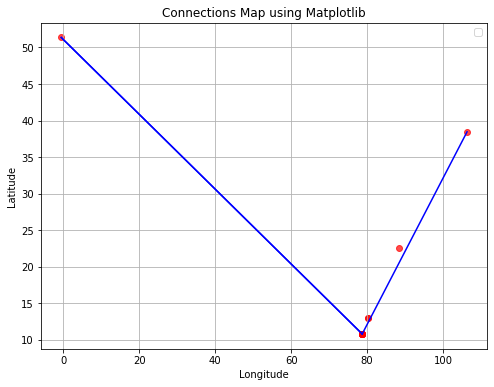

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Longitude'], data['Latitude'], color='red',marker='o', alpha=0.7)

# Connect the locations with lines
for i in range(len(data) - 1):
    plt.plot([data['Longitude'].iloc[i], data['Longitude'].iloc[i+1]],
             [data['Latitude'].iloc[i], data['Latitude'].iloc[i+1]], color='blue')


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Connections Map using Matplotlib')
plt.legend()
plt.grid(True)
plt.show()


